![Projector](images/projector.jpg)

ITEMS TO CONSIDER BEFORE FINALIZING
**TODO**
**TODELETE** 
**LOOKUP**



# Project Title

**Author:** Joshua Allen

# Overview

Microsoft has decided to enter into the movie industry by opening up their own film studio.  Making a movie, especially for a first time studio, can be a risky venture and there is certainly no guarantee of success.  Therefore, Microsoft would like to understand what types of films perform the best at the box office and, based upon that, determine what characteristics of a movie they should seek to implement in their first film  to give them the best shot at success.

*TODO Input Conclusion Here*

## Business Problem

Microsoft's executive team are likely interested in two primary drivers of measures of success of films, **profitability** (return on investment) and **gross receipts** (revenues from tickets sales) as they make decisions for their new studio.  Based upon these two measures, the questions we will seek to answer are:

1. What genres of movies generate the most revenue and profit?
2. Does the runtime of a movie affect the revenue and profitability?
3. How the chosen release date of a movie affects the revenue and profitability of the film?

These questions are important to Microsoft as they will largely drive the decision of what movie should be made.  By focusing on how each of these items on revenues and profitability we can make a recommendation to Microsoft as to what characteristics their first movie should contain.


## Data Understanding
---
To better answer the questions above we will consider data on movies from a few different sources.  

### CSV Datasets

We have two datasets that may contain useful information to our research.  Each of thiese files is a CSV.

- `bom.movie_gross.csv` - Dataset from [Box Office Mojo](https://www.boxofficemojo.com/)
- `tn.movie_budgets.csv` - Dataset from [The Numbers](https://www.the-numbers.com/)


### IMDB SQLite Database

[IMDB](https://www.imdb.com) stands for the Internet Movie Database.  According to their [Help Center](https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#) IMDB is:

> ...the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch.


IMDB The IMDB Entity Relationship Diagram (ERD) shown below represents all of the tables contained within the `im.db` SQLite database.  From within this database we will primarily focus on the following tables:
- `movie_basics`
- `movie_ratings`

![IMDB ERD](images/movie_data_erd.jpeg)


***
TODELETE
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

### Importing Packages

In order to analyze the data sources identified above, I identified some Python libraries that will be useful throughout the project and included a brief description of each from their website:

- `Pandas` - A fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- `Numpy` - A package for scientific computing in Python
- `Matplotlib` - A Library for creating static, animated, and interactive visualizations in Python
- `Seaborn` - A Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics
- `SQLite3` - A module for accessing disk-based databases that don’t require a separate server process 
- `OS` - A Python module that provides a portable way of using operating system dependent functionality
- `Glob` - A Python module that will help us generate a list of file paths

In [1]:
# Import standard packages for use in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import glob
import os

# Magic function to render any matplotlib visualizations 
# directly in the notebook
%matplotlib inline

In [2]:
# Setting pandas option to display 20 rows of a resulting dataframe 
pd.set_option('display.max_rows', 30)

### Reading In Data

#### Reading in initial CSV Files

Even though we think we are only concerned with the two datasets above, we will go ahead and review all the potential data sources that we have.  In order to do this we first will need to create a list of the data files that we currently have.

In [3]:
# Creating a list of .csv files using Glob

data_folder = 'ZippedData/'
files = glob.glob('ZippedData/*.*sv')
files

['ZippedData/tmdb.movies.csv',
 'ZippedData/rt.reviews.tsv',
 'ZippedData/tn.movie_budgets.csv',
 'ZippedData/bom.movie_gross.csv',
 'ZippedData/rt.movie_info.tsv']

In [4]:
# creating a function that simply prints a divider to separate items that are
# being displayed or printed later in the project)
def divider():
    return '****************************************************************'

In [5]:
# Using a loop to read each file, store it in a dictionary and display the
# head and info to facilitate a review of each file

table_dict = {}
for file in files:
    print(divider())
    print(file)
    if '.tsv' in file:
        # Received error when trying to read fie wihtout encoding specified so
        # 'latin-1' was tried and it appears to work well
        proforma_df = pd.read_csv(file, sep='\t', encoding='latin-1')
        display(proforma_df.head())
        display(proforma_df.info())
    else:
        proforma_df = pd.read_csv(file)
        display(proforma_df.head())
        display(proforma_df.info())
    
    table_dict[file] = proforma_df

****************************************************************
ZippedData/tmdb.movies.csv


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

****************************************************************
ZippedData/rt.reviews.tsv


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

****************************************************************
ZippedData/tn.movie_budgets.csv


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

****************************************************************
ZippedData/bom.movie_gross.csv


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

****************************************************************
ZippedData/rt.movie_info.tsv


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

#### Reading in Initial SQLite Databaes

In addition to the data sets (`.tsv` and `.csv`) above, I also want to include data from the IMDB SQLite database that have available.  In order to do this I will utilize the sqlite3 module that was imported above to establish a connection and read the relevant database.

In [6]:
# Establishing a connection to the database
conn = sqlite3.connect('zippedData/im.db')

query = """
SELECT * 
  FROM movie_basics
"""

basics = pd.read_sql(query, conn)

# Confirming that basics is a dataframe and 
display(type(basics))
display(basics.head())
display(basics.info())

pandas.core.frame.DataFrame

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

After reading in the above files, it appears that the 3 resources that will be the most useful to us are:
    - movie_basics table from im.db SQLite database
    - bom.movie_gross.csv 
    - tn.movie_budgets.csv
    
We already have the movie_basics dataframe assigned a usable name of `basics`.  To make the other two more usable we will assign those dataframes values of `gross` and `budgets` respectively.

In [7]:
# Assigning more usable names to the movie_budgets and movie_gross dataframes
budgets = table_dict['ZippedData/tn.movie_budgets.csv']
gross = table_dict['ZippedData/bom.movie_gross.csv']

# Displaying the head and info of each to ensure the dataframes have been 
# properly stored in their respective variable names.
display(basics.head())
display(budgets.head())
display(gross.head())


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Finally, now that we have our 3 relevant dataframes, they can be merged to capture all of the data inside of one larger dataframe which should make our subsequent analysis simpler.  It should be noteed that the pd.merge() will merge based on any column(s) desired.  Contrast this with pd.join() will only allow the join to be completed based upon the index.  In our case we will need to merge on non-index columns so the pd.merge() function **LOOKUP** is the most appropriate choice for us to combine our dataframes.

In [8]:
# Before merging, renaming relevant title columns to 'movies' and setting each 
# of these to be the index of its respective dataframe.  

basics.rename(columns={'primary_title':'movie'}, inplace=True)
basics.set_index('movie', inplace=True)
display(basics.head(1))

budgets.set_index('movie', inplace=True)
display(budgets.head(1))

gross.rename(columns={'title':'movie'}, inplace=True)
gross.set_index('movie', inplace=True)
display(gross.head(1))


,movie_id,original_title,start_year,runtime_minutes,genres
movie,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"


,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"


,studio,domestic_gross,foreign_gross,year
movie,,,,
Toy Story 3,BV,415000000.0,652000000,2010


In [9]:
# Merging gross and basics based upon the name and year released
combo_df1 = gross.merge(basics, on='movie')
#checking to ensure the merge worked
combo_df1.head()

,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres
movie,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [10]:
# Now merging combo_df1 with the budgets dataframe

movie_df = combo_df1.merge(budgets, on='movie',
                           suffixes=('_left', '_right'))
display(movie_df.head())
print(f'\n Our final dataframe before data preparatioin has {movie_df.shape[0]} records with {movie_df.shape[1]} columns of data included at this time.')

,studio,domestic_gross_left,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_right,worldwide_gross
movie,,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"



 Our final dataframe before data preparatioin has 1602 records with 14 columns of data included at this time.


Now that we have our final `movie_df` dataframe with all of our relevant data.  The next step is to move to preparing the data for analysis.

---


## Data Preparation

### Cleaning Missing Values and Changing Data Types

Now that the relevant data is loaded into data frames the next task will be to clean our `movie_df` dataframe.  Throughout this process we will continuously tweak the dataframe that we currently have until we are satisfied with the resulting dataframe at which point we can begin our analysis.

***
TODELETE
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
#Get information about our dataframe so we can analyze potential problem areas
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, Toy Story 3 to Lean on Pete
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   studio                1602 non-null   object 
 1   domestic_gross_left   1601 non-null   float64
 2   foreign_gross         1372 non-null   object 
 3   year                  1602 non-null   int64  
 4   movie_id              1602 non-null   object 
 5   original_title        1602 non-null   object 
 6   start_year            1602 non-null   int64  
 7   runtime_minutes       1502 non-null   float64
 8   genres                1576 non-null   object 
 9   id                    1602 non-null   int64  
 10  release_date          1602 non-null   object 
 11  production_budget     1602 non-null   object 
 12  domestic_gross_right  1602 non-null   object 
 13  worldwide_gross       1602 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 187.7+ KB


A couple of items stand out as obvious issues that need to be cleaned up.  First, we will take care of the columns that we can just delete.  This will include columns that will not be relevant in our analysis as well as columns that appear to be duplicates from the various dataframes created from the data sets.  Columns we can get rid of are:

- `studio` - This does not figure to be part of our analysis
- `domestic_gross_left` - This was from our gross dataframe and duplicates the `domestic_gross_right` which we will keep since it is more detailed (unrounded)
- `foreign_gross` - Since we are removing the `domestic_gross_left` it makes sense to delete the corresponding `foreign_gross` from the same table (if we discover we need foreign gross we can derive it from the remaining `worldwide_gross` less `domestic_gross`
- `year` - we will keep the `start year` column from the `im.db` file instead
- `movie_id` and `id` - This will not assist in our analysis so we will remove
- `original_title` - We are utilizing the movie title that is now the index so this is mostly duplicative information or foreign language titles which we do not need

In [12]:
# Dropping unneeded columns from the dataframe
movie_df.drop(labels=['studio','domestic_gross_left', 'foreign_gross', 'year',
                      'movie_id', 'id', 'original_title'], axis=1, 
                      inplace=True)

movie_df.head(1)

,start_year,runtime_minutes,genres,release_date,production_budget,domestic_gross_right,worldwide_gross
movie,,,,,,,
Toy Story 3,2010,103.0,"Adventure,Animation,Comedy","Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"


In [13]:
# In addition we will rename the domestic_gross_right column and reorder the 
# columns to move the budgets and revenues closer to the front of the table

movie_df.rename(columns={'domestic_gross_right':'domestic_gross'}, 
                inplace=True)
new_cols = ['release_date', 'production_budget', 'domestic_gross', 
            'worldwide_gross', 'start_year', 'runtime_minutes', 'genres']
movie_df = movie_df.reindex(columns=new_cols)

Now that the dataframe contains the data we will want to use for our analysis and in a good order, the time has come to work on the values within the columns themselves.  First the genres `column` is a string which will not be very useful to us in cases where there are multiple genres.  The `str.split()` method will provide a list type in the genre column if we split along a `','`.

In [14]:
# Changing the genres to be a list for each movie using a lambda function
# Got an error with (lambda x: x.split(',') so we first need to check for the
# presence of x before we run the split)
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split(',')
                                              if x else x)
movie_df.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Toy Story 3,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",2010,103.0,"[Adventure, Animation, Comedy]"
Inception,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",2010,148.0,"[Action, Adventure, Sci-Fi]"
Shrek Forever After,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",2010,93.0,"[Adventure, Animation, Comedy]"
The Twilight Saga: Eclipse,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",2010,124.0,"[Adventure, Drama, Fantasy]"
Iron Man 2,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",2010,124.0,"[Action, Adventure, Sci-Fi]"


The Dtype of the `production_budget`, `domestic_gross`, and `worldwide_gross` are all objects rather than an integer format.  We will write a for loop to clean up these columns by first removing incompatable characters within each column and then convert them into an integer type.

In [15]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Create a for loop to strip out the commas and dollar signs and change the
# money_cols to 'int64'


for col in money_cols:
    movie_df[col] = movie_df[col].str.replace('$', '')
    movie_df[col] = movie_df[col].str.replace(',', '').astype('int')

# Check to ensure the for loop works
display(movie_df.info())
display(movie_df.head(1))


<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, Toy Story 3 to Lean on Pete
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1602 non-null   object 
 1   production_budget  1602 non-null   int64  
 2   domestic_gross     1602 non-null   int64  
 3   worldwide_gross    1602 non-null   int64  
 4   start_year         1602 non-null   int64  
 5   runtime_minutes    1502 non-null   float64
 6   genres             1576 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 100.1+ KB


None

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Toy Story 3,"Jun 18, 2010",200000000,415004880,1068879522,2010,103.0,"[Adventure, Animation, Comedy]"


The `release_date` column is also a string Dtype.  We should be able to use the pd.to_datetime function to convert it into a more useable datatype.

In [16]:
# Use pd.to_datetime to convert the release date string to a date type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, Toy Story 3 to Lean on Pete
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1602 non-null   datetime64[ns]
 1   production_budget  1602 non-null   int64         
 2   domestic_gross     1602 non-null   int64         
 3   worldwide_gross    1602 non-null   int64         
 4   start_year         1602 non-null   int64         
 5   runtime_minutes    1502 non-null   float64       
 6   genres             1576 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 100.1+ KB


Finally we need to address our columns that have missing data.  Currently it looks like we are missing values in `runtime_minutes` and `genres`.  

In [17]:
# Check each column to see if there are any missing columns
print('Below are the number of records with missing data for each column:')
display(movie_df.isna().sum())

# Loop through the columns to determine what percentage of data we are missing
print('Below are the percentage of the total records that the records with ' \
       'missing data represent:')
for col in movie_df.columns:
    missing_records = movie_df[col].isna().sum()
    missing_percent = round((missing_records / len(movie_df) * 100), 2)
    if missing_records == 0:
        continue
    else:
        print(f'The {col} column has {missing_records} which represent ' \
              f'{missing_percent}% of the total dataset')

Below are the number of records with missing data for each column:


release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
start_year             0
runtime_minutes      100
genres                26
dtype: int64

Below are the percentage of the total records that the records with missing data represent:
The runtime_minutes column has 100 which represent 6.24% of the total dataset
The genres column has 26 which represent 1.62% of the total dataset


Even if each record for runtime_minutes and genres that is missing is mutually exclusive, dropping them would only remove less than 8 percent of the data set.  Therefore we will go ahead and drop all recores that are NA using the `df.dropna()` function.

In [18]:
# Dropping the runtime_minutes and genres columns that are NaN
movie_df.dropna(axis=0, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, Toy Story 3 to Lean on Pete
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1496 non-null   datetime64[ns]
 1   production_budget  1496 non-null   int64         
 2   domestic_gross     1496 non-null   int64         
 3   worldwide_gross    1496 non-null   int64         
 4   start_year         1496 non-null   int64         
 5   runtime_minutes    1496 non-null   float64       
 6   genres             1496 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 93.5+ KB


### Creating Variables

Now that our columns have been cleaned up and we have removed rows with null data, we are left with 1496 records on which to run our analysis.  Before we proceed with the data analysis there are a couple of numeric variables that we would like to create to use in our analysis.  The two variables we will create are `revenue_ratio` that compares the `worldwide_gross` against the `production_budget` cost for the film and `profit` which will simply subtract the `production_budget` from the `worldwide_gross`.  These will be useful for us as they will allow us to compare movies without worrying about costs of inflation across the years.

In addition, we will create a new column `release_month` to facilitate our analysis of whether movies released during certain times of the year perform better than others.

In [19]:
# Creating revenue_ratio and profit variables
profit = (movie_df['worldwide_gross'] - movie_df['production_budget'])
rev_ratio = (movie_df['worldwide_gross'] / movie_df['production_budget'])

movie_df.insert(4, 'profit', profit)
movie_df.insert(5, 'rev_ratio', rev_ratio)

# Checking to ensure the columns were correctly input and the calculations 
# worked correctly
movie_df.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,rev_ratio,start_year,runtime_minutes,genres
movie,,,,,,,,,
Toy Story 3,2010-06-18,200000000,415004880,1068879522,868879522,5.344398,2010,103.0,"[Adventure, Animation, Comedy]"
Inception,2010-07-16,160000000,292576195,835524642,675524642,5.222029,2010,148.0,"[Action, Adventure, Sci-Fi]"
Shrek Forever After,2010-05-21,165000000,238736787,756244673,591244673,4.583301,2010,93.0,"[Adventure, Animation, Comedy]"
The Twilight Saga: Eclipse,2010-06-30,68000000,300531751,706102828,638102828,10.383865,2010,124.0,"[Adventure, Drama, Fantasy]"
Iron Man 2,2010-05-07,170000000,312433331,621156389,451156389,3.653861,2010,124.0,"[Action, Adventure, Sci-Fi]"


In [20]:
# Adding a release month to the end of the dataframe for later use
movie_df['release_month'] = movie_df['release_date'].dt.month

# Checking to see if it prperly created the new column with the release month
movie_df.head()
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, Toy Story 3 to Lean on Pete
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1496 non-null   datetime64[ns]
 1   production_budget  1496 non-null   int64         
 2   domestic_gross     1496 non-null   int64         
 3   worldwide_gross    1496 non-null   int64         
 4   profit             1496 non-null   int64         
 5   rev_ratio          1496 non-null   float64       
 6   start_year         1496 non-null   int64         
 7   runtime_minutes    1496 non-null   float64       
 8   genres             1496 non-null   object        
 9   release_month      1496 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 128.6+ KB


### Creating a Genres Based Dataframe
Finally, we need to create a dataframe that is useful to us for us to analyze the movies by genre. Currently, because the genre for each movie is a list, we will need to use the `.explode` function to create a separate row for each genre for each movie.  We can then group the resulting dataframe by genre.

In [21]:
# Exploding the df to include individual lines for each genre of a movie
movie_genres = movie_df.explode('genres')
movie_genres.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,rev_ratio,start_year,runtime_minutes,genres,release_month
movie,,,,,,,,,,
Toy Story 3,2010-06-18,200000000,415004880,1068879522,868879522,5.344398,2010,103.0,Adventure,6
Toy Story 3,2010-06-18,200000000,415004880,1068879522,868879522,5.344398,2010,103.0,Animation,6
Toy Story 3,2010-06-18,200000000,415004880,1068879522,868879522,5.344398,2010,103.0,Comedy,6
Inception,2010-07-16,160000000,292576195,835524642,675524642,5.222029,2010,148.0,Action,7
Inception,2010-07-16,160000000,292576195,835524642,675524642,5.222029,2010,148.0,Adventure,7


In [22]:
# Grouping the dataframe by genre and using the median as a the measure of 
# central tendency
movie_genres.groupby('genres').median().sort_values('profit')

,production_budget,domestic_gross,worldwide_gross,profit,rev_ratio,start_year,runtime_minutes,release_month
genres,,,,,,,,
Western,30000000.0,4048164.5,8365948.0,-5532561.0,0.724281,2011.5,107.0,10.5
War,17500000.0,2703296.0,17769299.0,-898947.0,0.888465,2014.0,117.0,4.0
News,18900000.0,10740322.5,31657826.5,12757826.5,0.983411,2014.0,68.0,10.5
Sport,20000000.0,30127963.0,45707924.0,15138912.0,1.745181,2014.0,115.0,9.0
Drama,17500000.0,18007317.0,36964656.0,15264271.0,2.020304,2014.0,109.0,8.0
Documentary,17500000.0,21443494.0,38993548.0,17425450.0,1.744431,2015.0,72.0,7.0
Crime,28000000.0,23591432.0,44264271.0,19535736.0,1.796409,2014.0,109.0,8.0
Romance,15350000.0,21296196.5,41163998.5,20023500.0,2.514607,2012.0,103.0,7.0
Biography,20000000.0,18050944.0,42372976.5,20287203.5,1.917358,2015.0,116.0,9.5


## Data Modeling

Now that we have a usable dataset that will help us to answer our questions we can turn to analyzing the data and generating visualizations that will guide us towards our ultimate recommendations.

***
TODELETE
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

First, as we consider our genres let's just first take a look at a histogram of genres to get a feel for whether or not we have enough data from each genre to make generalizations about it.

In [23]:
"""In our genres dataframe, re-setting the index so that we retain the title 
of the movie but we wind up with the index of the dataframe being the genre"""

movie_genres.reset_index(inplace=True)
movie_genres.set_index('genres', inplace=True)

In [24]:
# Sorting the datafram by genre and getting a count of the genres
movie_genres.sort_index()
genre_count = movie_genres.groupby(by='genres').count()['movie']
genres = movie_genres.index.unique()

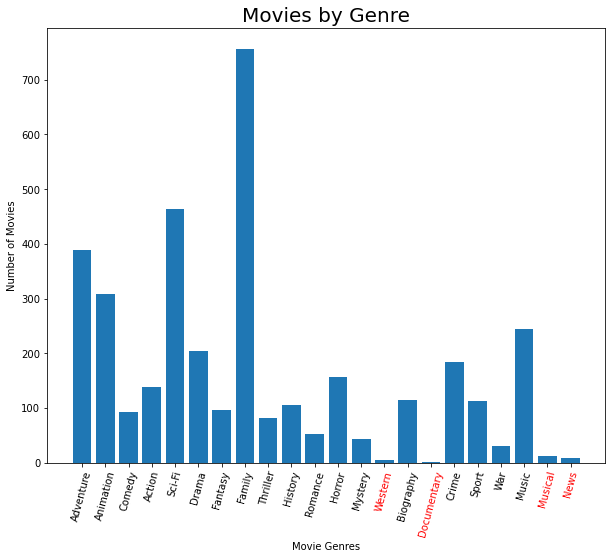

In [37]:
# Creating a bar chart 
low_counts = [13, 15, 20, 21] #This represents the xticklabels that have low counts 
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Movies by Genre', fontsize=20)
ax.bar(x=genres, height=genre_count)
ax.set_xlabel('Movie Genres')
plt.xticks(rotation=75)
for tick in low_counts:
    ax.get_xticklabels()[tick].set_color('red')
ax.set_ylabel('Number of Movies');

In [ ]:
sns.pairplot(movie_df)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
TODELETE
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
TODELETE
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***